In [1]:
%matplotlib inline
from tensorflow.keras.layers.experimental.preprocessing import Normalization
from sklearn import preprocessing
from sklearn.datasets import make_regression
from keras.layers import Dense
from keras.layers import Flatten
from keras.models import Sequential
from keras.optimizers import SGD
from dataset_manager import *
from predict import *
from trame_show import *
from datetime import date, datetime
from termcolor import colored
import random


train_dataset, test_dataset = get_dataset()
shift_letter(train_dataset, test_dataset)
ctrl_alt_suppr(train_dataset, test_dataset)
d_list = list(test_dataset)

#train_dataset, test_dataset = filtre(train_dataset, test_dataset, 0.3)

X_train, Y_train = get_X_Y_vectorized_int(train_dataset)
X_test, Y_test = get_X_Y_vectorized_int(test_dataset)

X_train, Y_train = shuffle_X_Y(X_train, Y_train)
X_test, Y_test = shuffle_X_Y(X_test, Y_test)

#X_login_mdp, _ = get_pics_from_file(f"../tohack/pics_LOGINMDP.bin")
#X_login_mdp_filtred = filtre_result(X_login_mdp, np.array(train_dataset.get('NOKEY')).mean(0), 0.3)

['i', 'd', '2', 'CTRL', 'e', 'j', 'm', '8', 'r', 'z', '0', 'SPACE', '5', 'w', 'SUPPR', 'y', 'q', 'l', '9', 'b', 'o', '7', 'NOKEY', 'p', 'u', 'x', 'ENTER', '3', 'SHIFT', '4', '6', 'f', 'h', 's', 't', 'a', '1', 'c', 'v', 'k', 'g', 'n', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z', 'ALT', 'CTRL+ALT', 'CTRL+ALT+SUPPR']


In [4]:
def train_model(epochs, batch_size, couches_neu):
    """Réseau de neurones"""
    delta_time = datetime.now().time()
    model = Sequential()
    model.add(Dense(17))
    for _ in range(couches_neu):
        model.add(Dense(128, activation='sigmoid'))
    model.add(Dense(len(d_list)))

    model.compile(loss='mean_squared_error', optimizer='adam', metrics=['accuracy'])

    model.fit(np.array(X_train), np.array(Y_train), epochs=epochs, batch_size=batch_size, )
    
    test_loss, test_acc = model.evaluate(np.array(X_test), np.array(Y_test), verbose=3)

    accuracy = compute_accuracy_keras(model, d_list, X_test, Y_test)
    real_accu = sum(accuracy.values()) / len(d_list)
    
    return model, accuracy, real_accu

In [6]:
model, accuracy, real_accu = train_model(10, 60, 6)

print("======\nAccuracy:")

for key, acc in accuracy.items():
    print(key, acc)
    
print("accuracy: ", real_accu)

Epoch 1/10
10838/10838 [==============================] - 15s 1ms/step - loss: 0.0145 - accuracy: 0.1037
Epoch 2/10
10838/10838 [==============================] - 15s 1ms/step - loss: 0.0090 - accuracy: 0.4527
Epoch 3/10
10838/10838 [==============================] - 15s 1ms/step - loss: 0.0078 - accuracy: 0.5146
Epoch 4/10
10838/10838 [==============================] - 15s 1ms/step - loss: 0.0075 - accuracy: 0.5334
Epoch 5/10
10838/10838 [==============================] - 15s 1ms/step - loss: 0.0074 - accuracy: 0.5450
Epoch 6/10
10838/10838 [==============================] - 15s 1ms/step - loss: 0.0073 - accuracy: 0.5496
Epoch 7/10
10838/10838 [==============================] - 15s 1ms/step - loss: 0.0072 - accuracy: 0.5534
Epoch 8/10
10838/10838 [==============================] - 15s 1ms/step - loss: 0.0072 - accuracy: 0.5577
Epoch 9/10
10838/10838 [==============================] - 15s 1ms/step - loss: 0.0071 - accuracy: 0.5588
Epoch 10/10
10838/10838 [==============================

In [7]:
res = get_prediction_list_keras(model, d_list)
print(res)
get_creds(res)

['NOKEY', 'NOKEY', 'NOKEY', 'NOKEY', 'NOKEY', 'NOKEY', 'NOKEY', 'NOKEY', 'w', 'NOKEY', 'NOKEY', 'NOKEY', 'NOKEY', 'NOKEY', 'NOKEY', 'NOKEY', 'NOKEY', 'NOKEY', 'NOKEY', 'NOKEY', 'NOKEY', 'NOKEY', 'NOKEY', 'NOKEY', 'NOKEY', 'NOKEY', 'NOKEY', 'NOKEY', 'NOKEY', 'NOKEY', 'NOKEY', 'NOKEY', 'NOKEY', 'NOKEY', 'NOKEY', 'NOKEY', 'NOKEY', 'NOKEY', 'NOKEY', 'NOKEY', 'NOKEY', 'NOKEY', 'NOKEY', 'NOKEY', 'NOKEY', 'NOKEY', 'NOKEY', 'NOKEY', 'NOKEY', 'NOKEY', 'NOKEY', 'NOKEY', 'NOKEY', 'NOKEY', 'NOKEY', 'NOKEY', 'NOKEY', 'NOKEY', 'NOKEY', 'NOKEY', 'NOKEY', 'NOKEY', 'NOKEY', 'NOKEY', 'NOKEY', 'NOKEY', 'NOKEY', 'NOKEY', 'NOKEY', 'NOKEY', 'NOKEY', 'NOKEY', 'NOKEY', 'NOKEY', 'NOKEY', 'NOKEY', 'NOKEY', 'NOKEY', 'NOKEY', 'NOKEY', 'SUPPR', 'NOKEY', 'NOKEY', 'NOKEY', 'NOKEY', 'NOKEY', 'NOKEY', 'NOKEY', 'NOKEY', 'NOKEY', 'NOKEY', 'NOKEY', 'NOKEY', 'NOKEY', 'NOKEY', 'NOKEY', 'NOKEY', 'NOKEY', 'NOKEY', 'NOKEY', 'NOKEY', 'NOKEY', 'NOKEY', 'NOKEY', 'NOKEY', 'NOKEY', 'NOKEY', 'NOKEY', 'NOKEY', 'NOKEY', 'NOKEY', 'NOK

['NOKEY', 'w', 'CTRL', '7', 'ALT', 'CTRL+ALT+SUPPR', 'ENTER', 'SHIFT', 'v', 'L', 'K', 'CTRL+ALT', 'l', 'k', 'c', 'o']


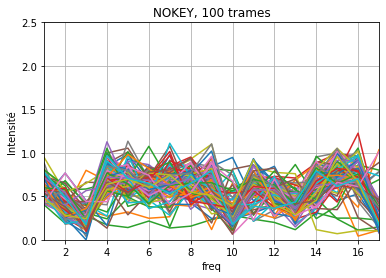

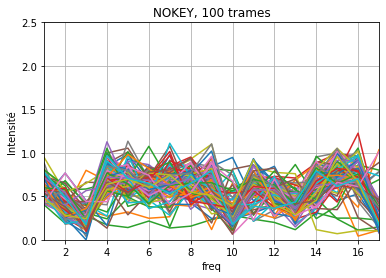

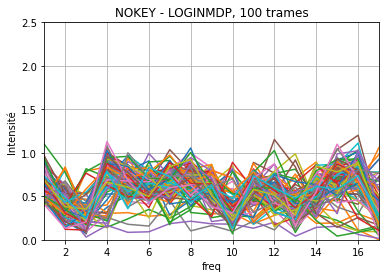

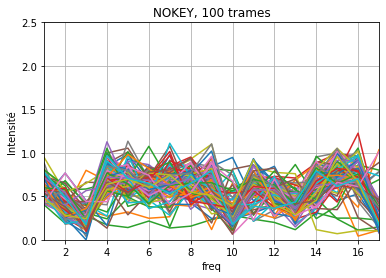

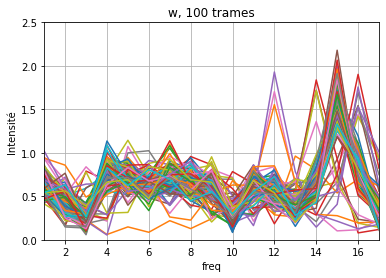

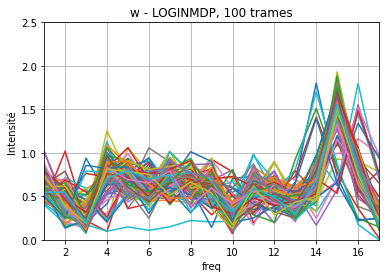

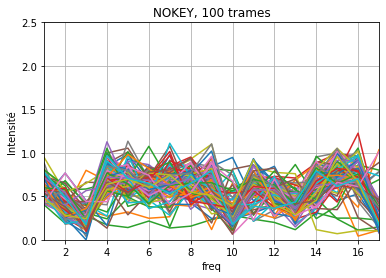

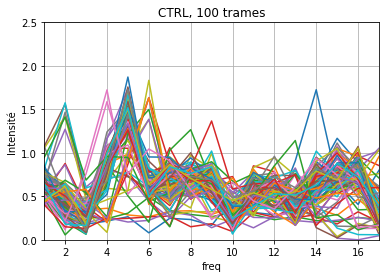

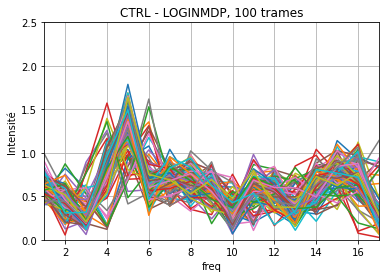

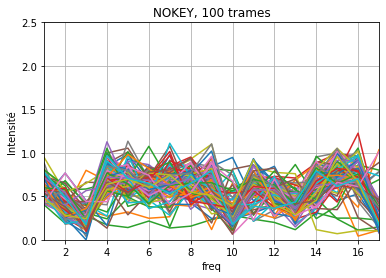

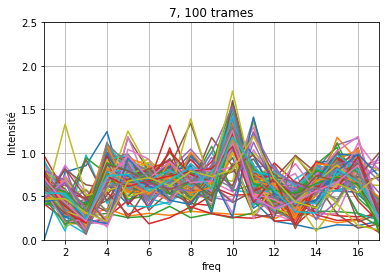

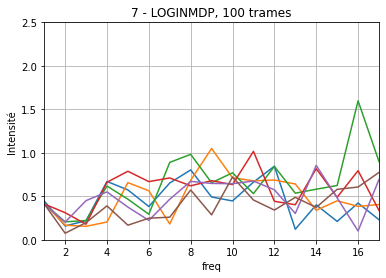

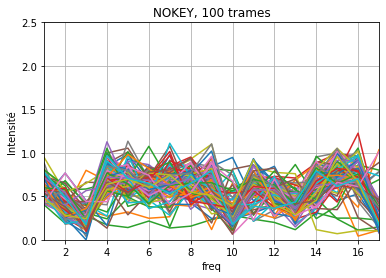

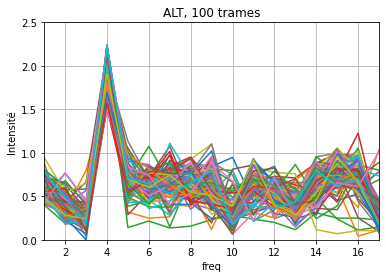

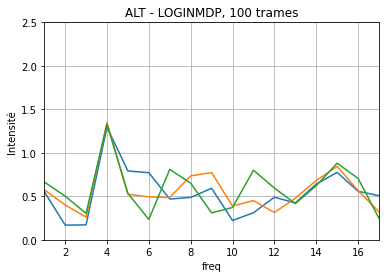

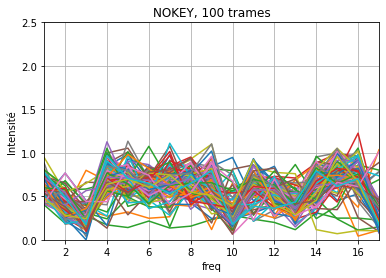

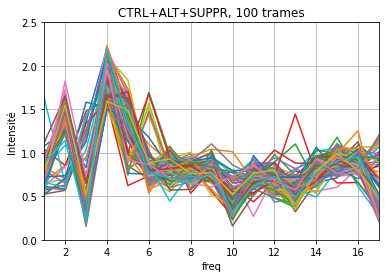

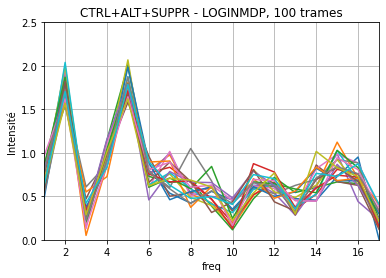

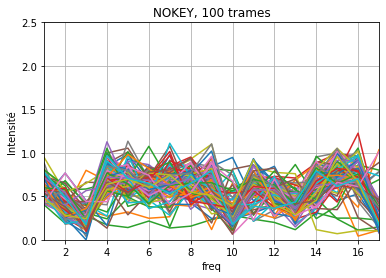

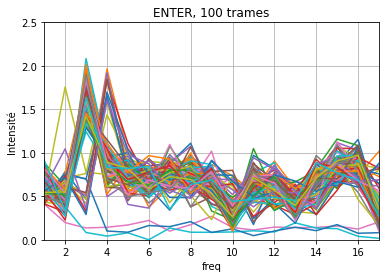

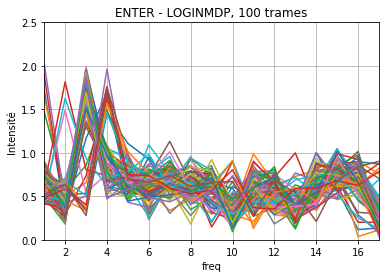

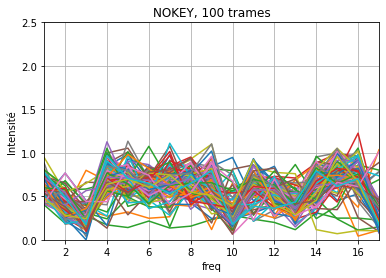

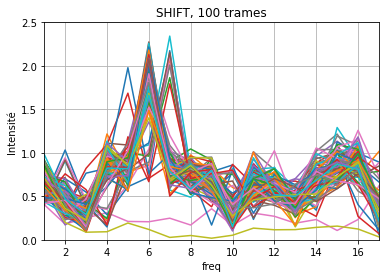

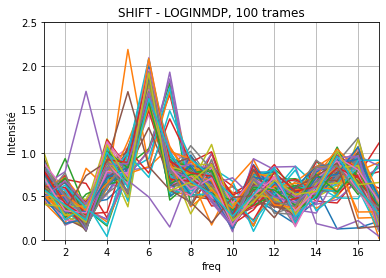

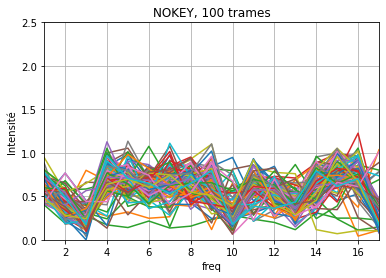

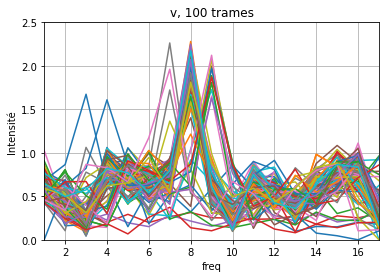

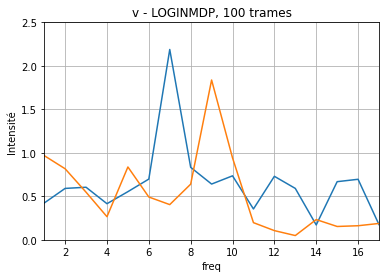

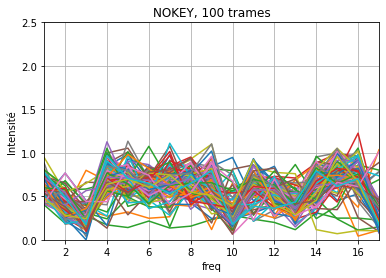

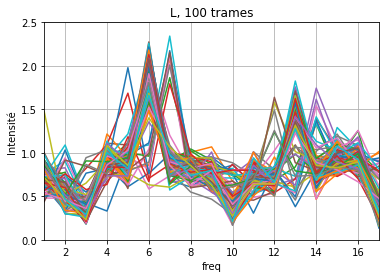

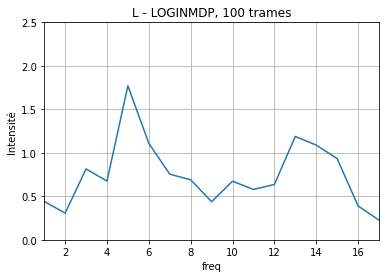

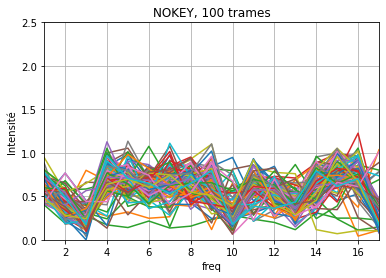

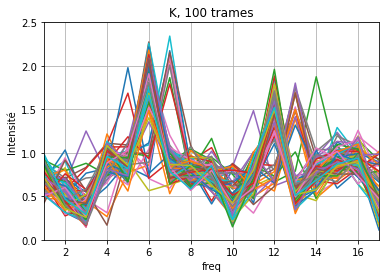

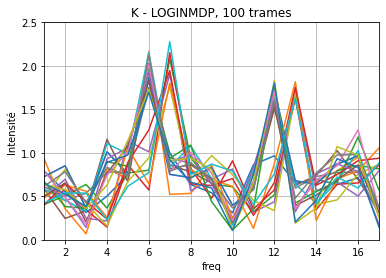

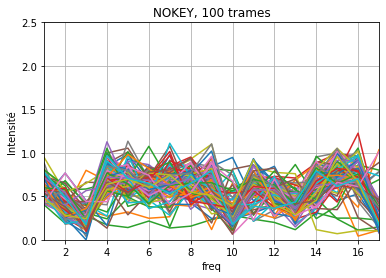

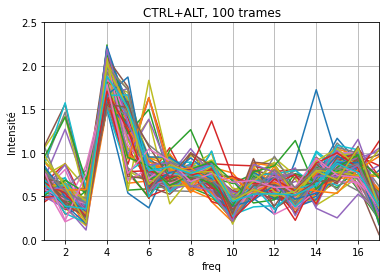

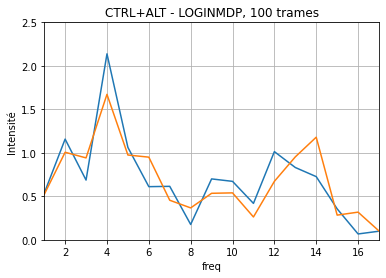

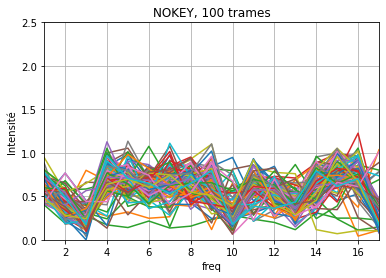

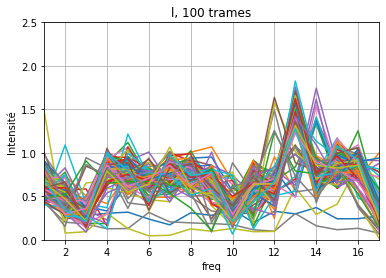

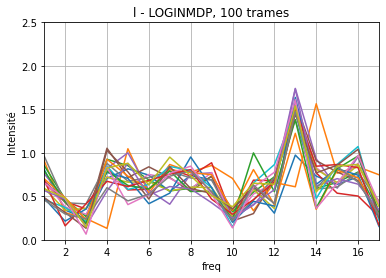

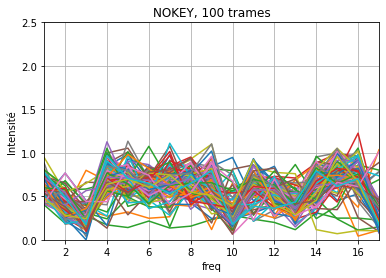

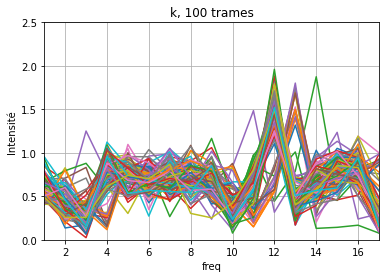

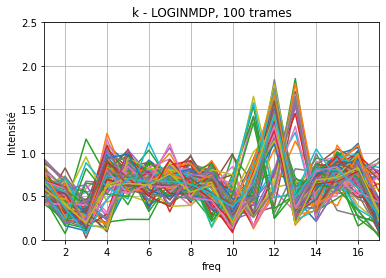

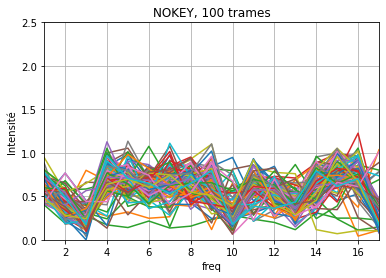

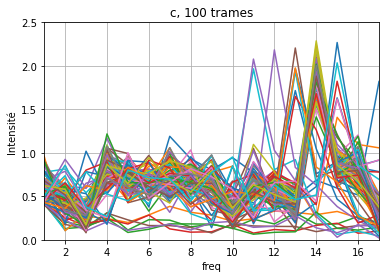

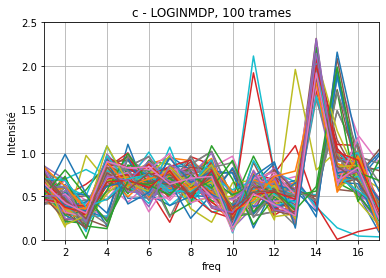

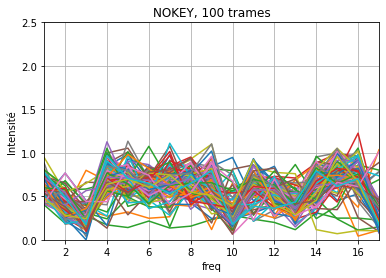

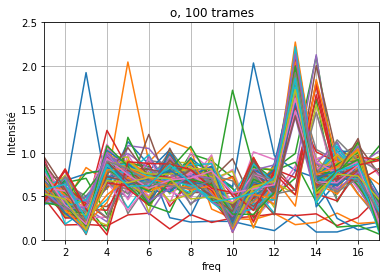

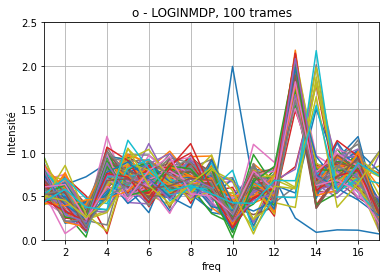

In [8]:
trame_show_result(train_dataset, accuracy, res, 0.8)

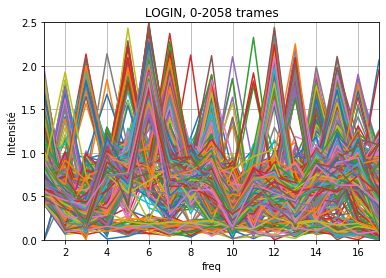

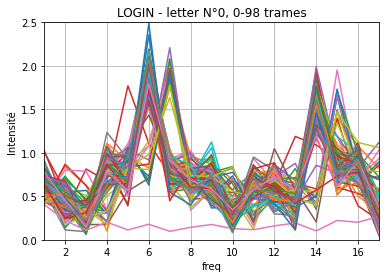

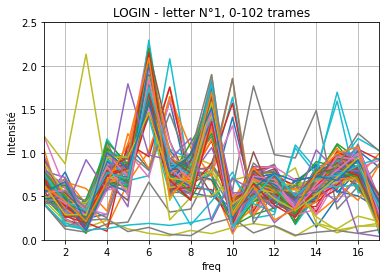

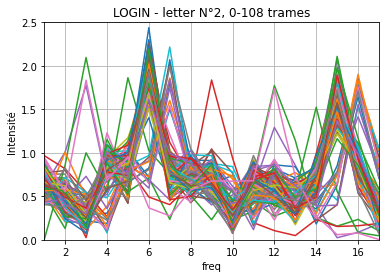

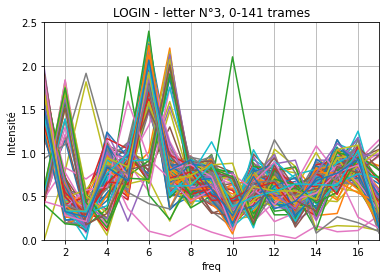

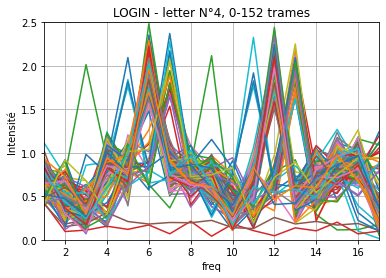

In [9]:
def find_start_sequence_index(arr, sub):
    start_seq, i_seq = None, 0
    for i_arr, e_arr in enumerate(arr):
        if not start_seq and sub[0] == e_arr:
            start_seq, i_seq = i_arr, 1
        elif start_seq and len(sub) <= i_seq:
            return start_seq
        elif start_seq and sub[i_seq] != e_arr:
            start_seq, i_seq = None, 0
        elif i_seq:
            i_seq += 1
    return start_seq

def trame_showw(X, key, figure_nbr):
    plt.figure()
    for i in X:
        plt.plot(range(1, len(i) + 1), i)
    
    plt.xlim(1, 17)
    plt.ylim(0, 2.5)
    plt.xlabel("freq")
    plt.ylabel("Intensité")
    plt.title("{0}, {1}-{2} trames".format(key, 0, figure_nbr))
    plt.grid()
    plt.show()

ctrl_alt_del_seq = (1481, 2147)
login_seq = (3011, 5069)
X_login_mdp, _ = get_pics_from_file("../tohack/pics_LOGINMDP.bin")
 
trame_showw(X_login_mdp[login_seq[0]:login_seq[1]], "LOGIN", login_seq[1] - login_seq[0])

letters = [
        (0, [
            'C', 'E', 'C', 'E', 'E', 'E', 'D', 'D', 'D', 'E', 'D', 'D', 'E', 'L', 'D', 'D', 'C', 'D', 'E', 'D', 'E', 'E', 'E', 'C', 'E', 'E', 'D', 'E', 'D', 'E', 'D', 'C', 'C', 'C', 'E', 'D', 'E', 'C', 'E', 'E', 'C', 'E', 'D', 'E', 'E', 'E', 'E', 'E', 'D', 'E', 'E', 'E', 'D', 'E', 'C', 'D', 'E', 'C', 'D', 'E', 'E', 'D', 'C', 'D', 'D', 'E', 'C', 'E', 'E', 'E', 'Q', 'E', 'D', 'K', 'D', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'D', 'E', 'E', 'NOKEY', 'E', 'E', 'C', 'E', 'E', 'D', 'SHIFT', 'SHIFT', 'C', 'E', 'E',
        ], 3224),
        (1, [
            'G', 'N', 'G', 'G', 'c', 'NOKEY', 'G', 'G', 'G', 'G', 'G', 'G', 'G', 'T', 'G', 'G', 'E', 'N', 'N', 'G', 'G', 'G', 'G', 'G', 'G', 'N', 'N', 'G', 'G', 'N', 'N', 'G', 'G', 'G', 'N', 'G', 'G', 'G', 'G', 'G', 'G', 'G', 'G', 'G', 'N', 'L', 'G', 'G', 'G', 'G', 'G', 'N', 'G', 'G', 'G', 'G', 'G', 'G', 'G', 'G', 'T', 'G', 'G', 'T', 'G', 'G', 'G', 'G', 'G', 'G', 'N', 'G', 'G', 'G', 'NOKEY', 'v', 'c', 'N', 'G', 'G', 'G', 'SHIFT', 'N', 'G', 'N', 'G', 'N', 'G', 'N', 'G', 'G', 'G', 'G', 'N', 'G', 'N', 'G', 'G', 'G', 'T', 'N', 'G'
        ], 3666),
        (2, [
            'Q', 'Q', 'W', 'W', 'A', 'A', 'Q', 'W', 'A', 'A', 'A', 'Q', 'W', 'Q', 'd', 'W', 'W', 'Q', 'Q', 'Q', 'A', 'W', 'W', 'Q', 'W', 'A', 'Q', 'Q', 'Q', 'Q', 'E', 'Q', 'A', 'W', 'A', 'W', 'W', 'W', 'A', 'W', 'SHIFT', 'Q', 'c', 'v', 'Q', 'Q', 'Q', 'A', 'Q', 'Q', 'Q', 'A', 'Q', 'A', 'A', 'SHIFT', 'Q', 'A', 'Q', 'A', 'A', 'Q', 'W', 'Q', 'Q', 'Q', 'Q', 'Q', 'Q', 'A', 'W', 'A', 'SHIFT', 'W', 'A', 'A', 'Q', 'Q', 'A', 'Q', 'W', 'A', 'W', 'Q', 'Q', 'A', 'Q', 'Q', 'Q', 'Q', 'Q', 'Q', 'W', 'A', 'SHIFT', 'A', 'W', 'SHIFT', 'A', 'Q', 'Q', 'A', 'SHIFT', 'W', 'A', 'Q', 'd', 'A', 
        ], 4034),    
        (3, [
            'P', 'P', 'P', 'P', 'P', 'P', 'P', 'P', 'w', 'P', 'SHIFT', 'P', 'P', 'P', 'P', 'R', 'SHIFT', 'P', 'P', 'P', 'P', 'P', 'P', 'P', 'P', 'P', 'P', 'P', 'm', 'P', 'P', 'P', 'P', 'P', 'P', 'P', 'P', 'P', 'P', 'P', 'P', 'P', 'P', 'P', 'P', 'P', 'SHIFT', 'SHIFT', 'P', 'P', 'P', 'P', 'P', 'P', 'P', 'P', 'P', 'P', 'P', 'P', 'P', 'P', 'P', 'SHIFT', 'P', 'm', 'P', 'SHIFT', 'P', 'P', 'P', 'P', 'P', 'P', 'P', 'P', 'P', 'P', 'P', 'SHIFT', 'P', 'P', 'P', 'P', 'SHIFT', 'SHIFT', 'SHIFT', 'P', 'SHIFT', 'P', 'P', 'P', 'P', 'P', 'P', 'P', '4', 'P', 'P', 'M', 'P', 'P', 'n', 'P', 'P', 'P', 'P', 'M', 'P', 'P', 'P', 'P', 'P', 'P', 'P', 'M', 'P', 'R', 'P', 'P', 'P', 'P', 'P', 'P', 'P', 'P', 'SHIFT', 'SHIFT', 'P', 'P', 'M', 'P', 'P', 'SHIFT', 'P', 'P', 'P', 'P', 'M', 'SHIFT', 'P', 
        ], 4423),
        (4, [
            'I', '4', 'NOKEY', 'I', 'K', 'I', 'I', 'K', 'K', 'I', 'I', 'I', 'I', 'K', 'I', 'I', 'I', 'K', 'K', 'I', 'I', 'I', 'I', 'I', 'I', 'I', 'I', 'I', 'I', 'I', 'K', 'I', 'I', 'I', 'K', 'I', 'I', 'I', 'I', 'I', 'I', 'I', 'I', 'I', 'I', 'K', 'I', 'I', 'I', 'I', 'I', 'I', 'I', 'I', 'I', 'I', 'I', 'I', 'I', 'I', 'I', 'I', 'I', 'K', 'K', 'K', 'I', 'I', 'I', 'I', 'I', 'I', 'I', 'I', 'I', 'I', 'I', 'I', 'I', 'I', 'I', 'I', 'I', 'J', 'I', 'I', 'I', 'I', 'I', 'I', 'I', 'I', 'I', 'I', 'I', 'I', 'I', 'I', 'I', 'I', 'I', 'I', 'I', 'I', 'I', 'I', 'I', 'I', 'I', 'I', 'K', 'I', 'I', 'I', 'I', 'I', 'NOKEY', 'I', 'I', 'I', 'I', 'K', 'I', 'I', 'I', 'I', 'K', 'I', 'NOKEY', 'I', 'I', 'I', 'K', 'I', 'I', 'I', 'I', 'I', 'I', 'SHIFT', 'SHIFT', 'I', 'I', 'I', 'I', 'I', 'I', 'I', 'I', 'I', 'SHIFT', 'U',
        ], 4824),
]


for i, seq , start_tmp in letters:
    start = find_start_sequence_index(res, seq) or start_tmp 
    trame_showw(X_login_mdp[start: start + len(seq)], f"LOGIN - letter N°{i}", len(seq))